## 1. load the packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

import os
import time
import warnings
warnings.filterwarnings('ignore')

## 2. import dataset

In [19]:
data = '../data/TrainOnMe-1d3c80f1-d0b9-436e-9bcf-f50f94c66e0b.csv'
df = pd.read_csv(data,index_col=0)

## 3.EDA

In [18]:
print(df.shape)
print(df['y'].unique())

(5000, 14)
['Antrophic' 'OpenAI' 'Mistral']


In [20]:
df.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,Antrophic,199.84675,-0.22935,-94.57266,-0.90297,229.65733,-119.73784,Q4,0.12045,0.50670,13.31960,2.86055,True,951.94743
1,OpenAI,199.76663,0.57961,-98.69548,-0.89087,229.58771,-117.92856,Q4,-0.28505,0.16832,14.52734,-0.51453,True,949.48540
2,Antrophic,200.40804,-0.03834,-97.64719,-0.89971,230.20797,-121.71234,Q3,-0.13753,0.71530,9.90651,0.35612,True,953.21660
3,Antrophic,201.38523,0.51942,-105.16820,-0.89226,231.15781,-120.69422,Q2,0.03872,-0.37550,11.10684,1.32156,True,954.34203
4,OpenAI,199.60130,-0.76663,-94.42670,-0.88284,229.39822,-122.24543,Q4,0.46721,2.14220,9.72683,-4.96100,True,950.79316


:point_right:view summary of the dataset

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       5000 non-null   object 
 1   x1      5000 non-null   float64
 2   x2      5000 non-null   float64
 3   x3      5000 non-null   float64
 4   x4      5000 non-null   float64
 5   x5      5000 non-null   float64
 6   x6      5000 non-null   float64
 7   x7      5000 non-null   object 
 8   x8      5000 non-null   float64
 9   x9      5000 non-null   float64
 10  x10     5000 non-null   float64
 11  x11     5000 non-null   float64
 12  x12     5000 non-null   bool   
 13  x13     5000 non-null   float64
dtypes: bool(1), float64(11), object(2)
memory usage: 551.8+ KB


:point_right: frequency distribution of values in categorical variables and labels.

In [22]:
col_names=['y','x7']
for col in col_names:
    print(df[col].value_counts())

OpenAI       2039
Antrophic    1577
Mistral      1384
Name: y, dtype: int64
Q4       1722
Q3       1651
Boom!     768
Q2        719
Q1        140
Name: x7, dtype: int64


In [26]:
df[df=='Boom!'].count()

y        0
x1       0
x2       0
x3       0
x4       0
x5       0
x6       0
x7     768
x8       0
x9       0
x10      0
x11      0
x12      0
x13      0
dtype: int64

:eyes:
1. there are 13 variables in the dataset, including continuous, categorical and boolean values
2. there are 3 labels of the target which are "'Antrophic' 'OpenAI' 'Mistral'", so it is a classification problem
3. :exclamation:the dataset is **not perfectly balanced**, which may lead to a bias toward the majority class `OpenAI`

:point_right:missing values

In [24]:
df.isna().sum()

y      0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
dtype: int64

:eyes: :smile:there are no missing values in this dataset!

:point_right: statistics description of the dataset

In [27]:
df.describe()

,x1,x2,x3,x4,x5,x6,x8,x9,x10,x11,x13
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,200.024178,0.008813,-100.048286,-0.889050,229.823198,-120.715127,-0.009455,-0.002725,11.063009,-0.368877,950.096747
std,0.996196,0.701796,3.166388,0.006994,0.995935,1.797866,1.249162,1.222523,2.758224,3.381583,4.864654
min,196.980120,-2.557330,-112.221780,-0.910870,226.749730,-127.194620,-4.528530,-4.553040,0.580400,-13.345840,935.059800
25%,199.325927,-0.470495,-102.115178,-0.893730,229.126792,-121.939595,-0.751483,-0.754215,9.272417,-2.623135,946.687768
50%,200.003570,0.009440,-100.050305,-0.888825,229.803295,-120.733120,-0.024595,-0.011600,10.977415,-0.505355,949.988875
75%,200.713703,0.489422,-97.912615,-0.883667,230.511915,-119.481063,0.745343,0.745553,12.854080,1.783340,953.418130
max,203.545120,2.357430,-89.392710,-0.872220,233.335580,-113.704370,5.666690,5.091260,22.314140,11.793260,969.307150


1. before visualization, we need to normalization or standardization because differences between values of features are very high to observe on plot.
2. check outliers

In [46]:
# using min-max scaling to scale the data
scaler = MinMaxScaler()
df_scaled = df.copy()
numeric_cols = df_scaled.select_dtypes(include=[np.number]).columns.tolist()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

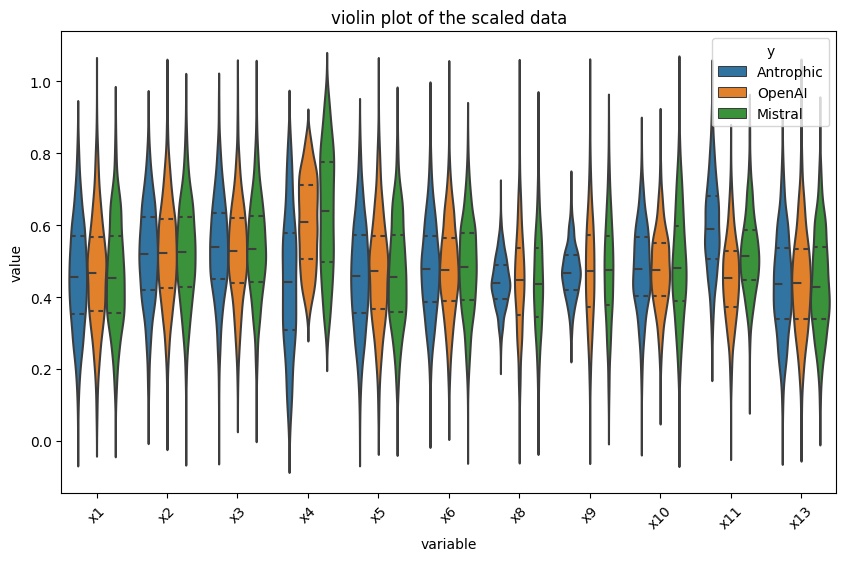

In [47]:
melt_df = pd.melt(df_scaled, id_vars=['y'], value_vars=numeric_cols)
plt.figure(figsize=(10,6))
sns.violinplot(data=melt_df,hue="y",x='variable',y='value',inner="quart",dodge=True)     
plt.xticks(rotation=45)
plt.title('violin plot of the scaled data')
plt.show()

In [ ]:
sns.set(style="whitegrid", palette="muted")

# Reduce points if dataset is large
sample_melt_df = melt_df.sample(1000)

# Plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x='variable', y='value', hue='y', data=melt_df, dodge=True)
plt.xticks(rotation=45)
plt.title("Swarm Plot of Features")
plt.legend(title="Class Label")
plt.show()

KeyboardInterrupt: 

:eyes:

1. **Feature separation**:  in `x4`,`x11` variable, the 3 labels look like separated, so it can be good for classification; some features (`x3`,`x6`,`x10`) show overlapping distributions, suggesting these features may not strongly differentiate between classes
2. **Symmetric vs. Asymmetric Distributions**: some features(e.g.`x5`,`x10`) show `symmertical distributions`, indicating a normal-like spread, others (e.g. `x8`,`x9`) are `asymmetrical`, meaning they could have skewness


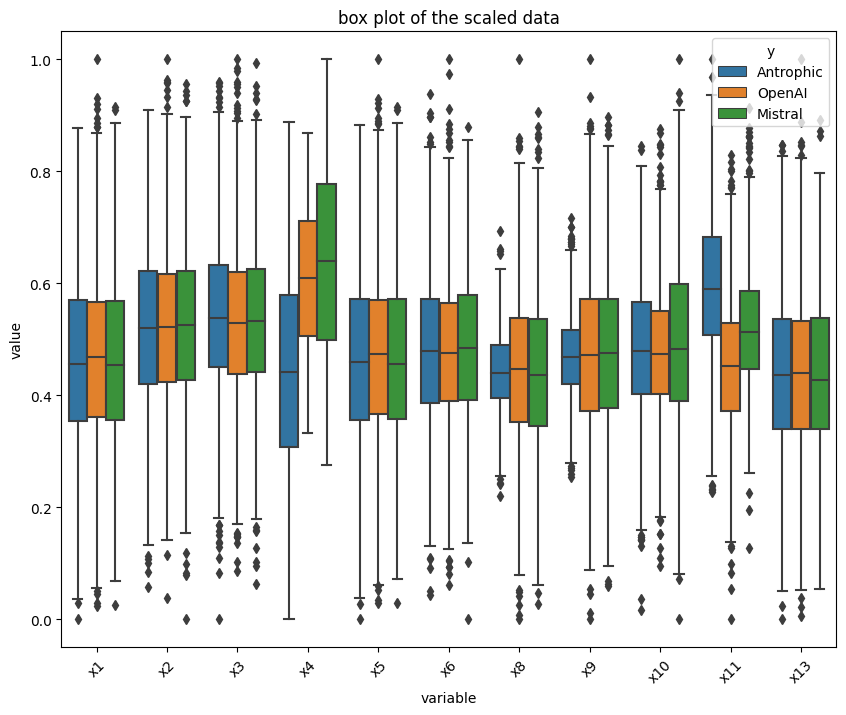

In [54]:
melt_df = pd.melt(df_scaled, id_vars=['y'], value_vars=numeric_cols)
plt.figure(figsize=(10,8))
sns.boxplot(data=melt_df,hue="y",x='variable',y='value')     
plt.xticks(rotation=45)
plt.title('box plot of the scaled data')
plt.show()

:eyes: 

1. Features like `x3`,`x6`,`x8`,`x9` have a significant number of outliers
2. Features such as `x1`,`x2`,`x3` have a nawwor IQR, meaning low variability
3. Features like `x8`, `x9` show larger variability across categories.

:point_right: check the correlation between similar features

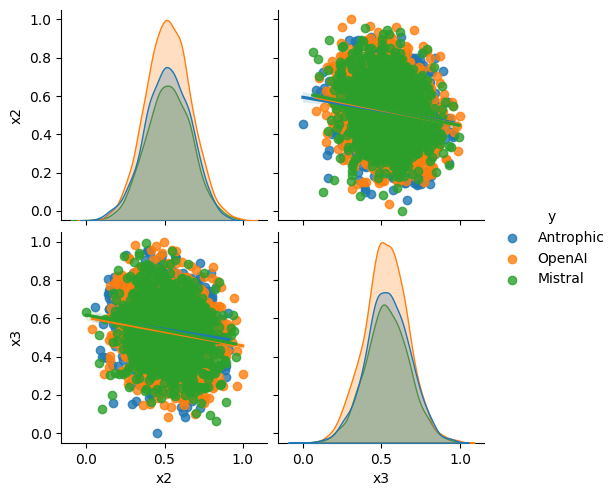

In [79]:
paired_cols = ['x2','x3','y']
sns.pairplot(df_scaled[paired_cols], hue="y", kind='reg', diag_kind='kde')
plt.show()

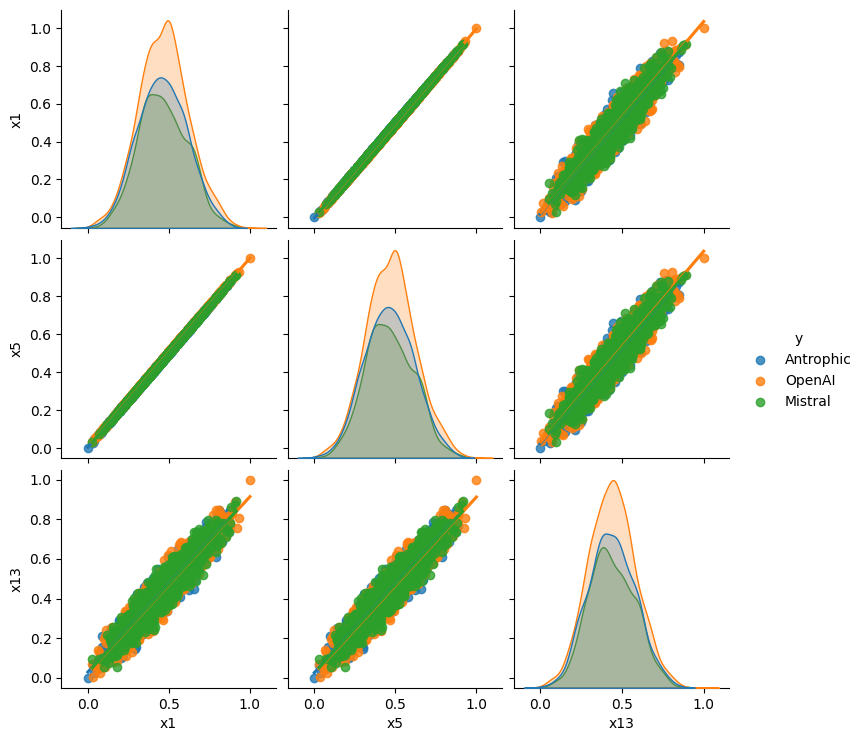

In [ ]:
paired_cols = ['x1','x5','x13','y']
sns.pairplot(df_scaled[paired_cols], hue="y", kind='bbreg', diag_kind='kde')
plt.show()

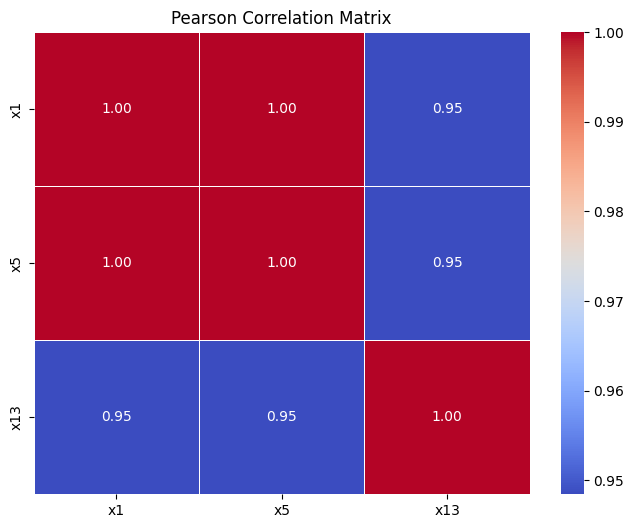

In [84]:
# Compute Pearson correlation matrix
corr_matrix = df_scaled[["x1", "x5","x13"]].corr(method="pearson")

# Display heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Matrix")
plt.show()


<AxesSubplot: >

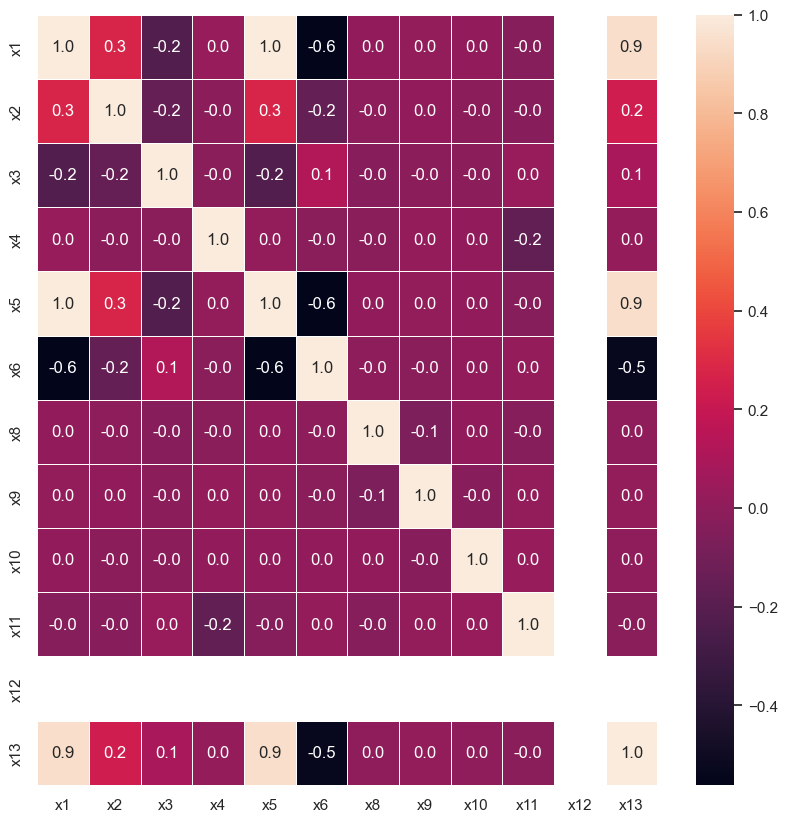

In [90]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_scaled.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

:question: what about 3 or more features comparison?